## ICMAR dataset Unsupervised ML Analysis

In [2]:
# Importing required Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
 
# Loading the Dataset ( ICMR datset "The ICMR dataset refers to health research datasets curated and managed by the Indian Council of Medical Research (ICMR)")

data = pd.read_csv('ICMR dataset.csv')
print("Shape:", data.shape)
print(data.head())
print(data.describe())

# Handleing the Missing Values

# Numeric columns

for col in data.select_dtypes(include=np.number).columns:
    data.fillna({col: data[col].median()}, inplace=True)

# Categorical columns

for col in data.select_dtypes(include='object').columns:
    data.fillna({col: data[col].mode()[0]}, inplace=True)


Shape: (801, 20532)
  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.

In [3]:
# Encode Categorical Variables

for col in data.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Splitting Features and Target varibles " unsupervised learning, having no target column is fine"

X = data.drop(columns=['Target']) if 'Target' in data.columns else data.copy()
y = data['Target'] if 'Target' in data.columns else None


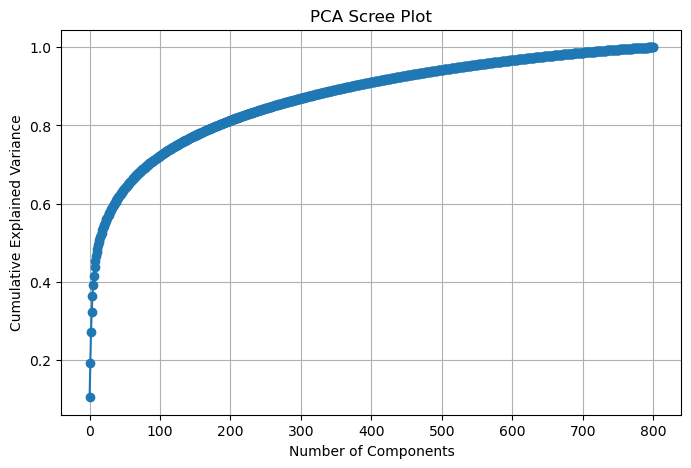

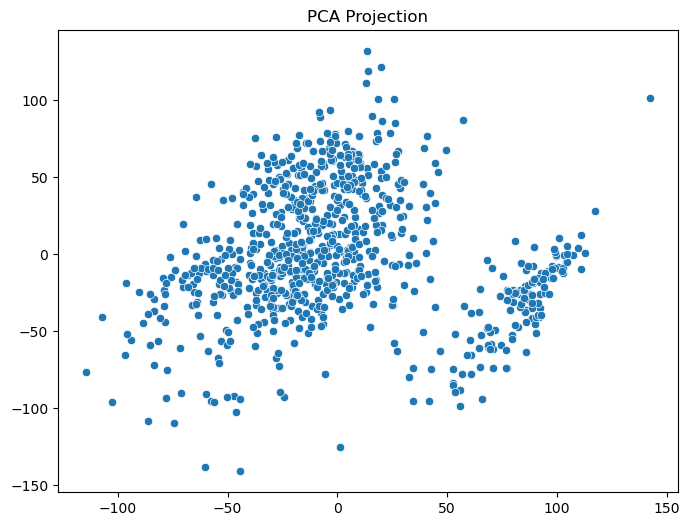

In [4]:
# Standardize Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA ( Principal Component Analysis) PCA is a dimensionality reduction technique.

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# PCA Scree Plot

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()

# optimal components = 2

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA Visualization

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)
plt.title('PCA Projection')
plt.show()



In [5]:
# LDA (Linear Discriminant Analysis) is a supervised dimensionality reduction technique.

if y is not None:
    lda = LDA(n_components=1)
    X_lda = lda.fit_transform(X_scaled, y)

    plt.figure(figsize=(8,6))
    sns.histplot(X_lda[:,0], hue=y, kde=True)
    plt.title('LDA Projection')
    plt.show()



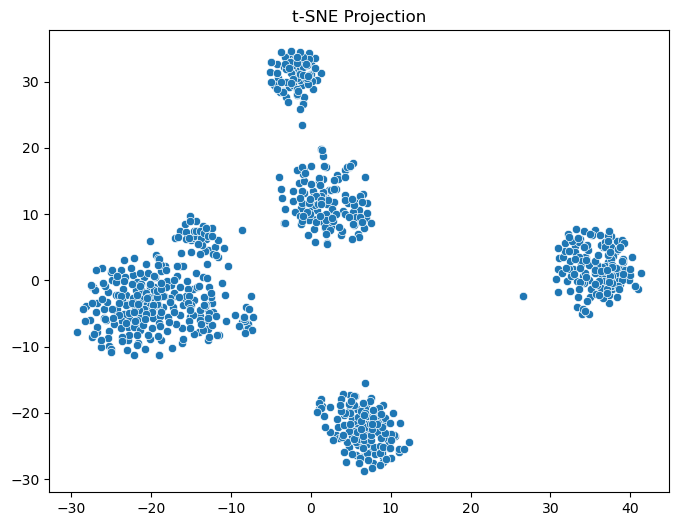

In [6]:
# t-SNE  (t-Distributed Stochastic Neighbor Embedding) is a technique for visualizing high-dimensional data in 2 or 3 dimensions.

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y)
plt.title('t-SNE Projection')
plt.show()

# Conclusions :

# Conclusions from Unsupervised Machine Learning Analysis:

## Key Findings:

1. **PCA (Principal Component Analysis)**:
   - Effective for dimensionality reduction and variance analysis
   - Does not always separate classes well unless variance directions align with class differences
   - Best used to determine optimal number of components and as preprocessing step

2. **LDA (Linear Discriminant Analysis)**:
   - Provides good class separation when assumptions are met and classes are distinct
   - Supervised method that maximizes inter-class separation
   - Ideal for evaluating feature effectiveness in distinguishing between known classes

3. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
   - Provides clearest visualization of local structure and cluster patterns
   - Excellent for exploring complex, non-linear relationships in high-dimensional data
   - Primarily for visualization purposes, not suitable for further analytical modeling

## Recommendations:

- Use **PCA** to assess variance retention with fewer dimensions and as preprocessing before clustering
- Use **LDA** to evaluate class separability when target labels are available
- Use **t-SNE** for visual exploration of hidden patterns and cluster structure in complex datasets

## Overall Insight:
Combining these three dimensionality reduction techniques provides a comprehensive understanding of data structure—PCA for variance-based reduction, LDA for supervised separation, and t-SNE for intuitive cluster visualization.